# 6-2 two classes - B - test model

In [1]:
%load_ext autoreload
%autoreload 2

from import_file import*


In [2]:
path = Path.cwd() / "processed_data" / "df_bi_B.pkl"
df = pd.read_pickle(path)

In [3]:
# Specifiying features and labels
X = df['statement']
y = df['label']

In [4]:
# Specifying train and test split with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0, stratify=y)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

10268 2568
10268 2568


## Defining Functions

In [5]:
stemmer = PorterStemmer()

def tokenizer(input_string):
    words = re.sub(r"[^A-Za-z0-9-]", " ", input_string) # Replace everything except a-zA-Z0-9- by a space
    words = words.lower() # Lower casing
    words = words.split() # Split a string into a list  
    words = [stemmer.stem(word) for word in words] #Stemming
    return words

In [6]:
# Stopwords list set to english
stopwords_list = stopwords.words('english')

In [7]:
model_dict = {}
model_accuracy = []

In [8]:
def print_results():
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    model_accuracy.append(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [9]:
def display_confusion_matrix(cm, classes, title='Confusion Matrix'):
    df_cm = pd.DataFrame(cm, index = classes, columns = classes)
    size = (10, 8)
    fig, ax = plt.subplots(figsize = size)
    sns.heatmap(df_cm, annot=True, cmap="Blues", center=0, fmt='g')
    ax.set_ylabel('Actual')    
    ax.set_xlabel('Predicted')
    plt.title(title)

## Logistic Regression

### Using `pipe1`

In [10]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe1_LR_bi_B.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[0]='pipe 1 Logistic Regression'
print_results() 

Accuracy:  0.6495327102803738
              precision    recall  f1-score   support

        Fake       0.68      0.88      0.77      1662
       Truth       0.51      0.22      0.31       906

    accuracy                           0.65      2568
   macro avg       0.59      0.55      0.54      2568
weighted avg       0.62      0.65      0.60      2568

[[1466  196]
 [ 704  202]]


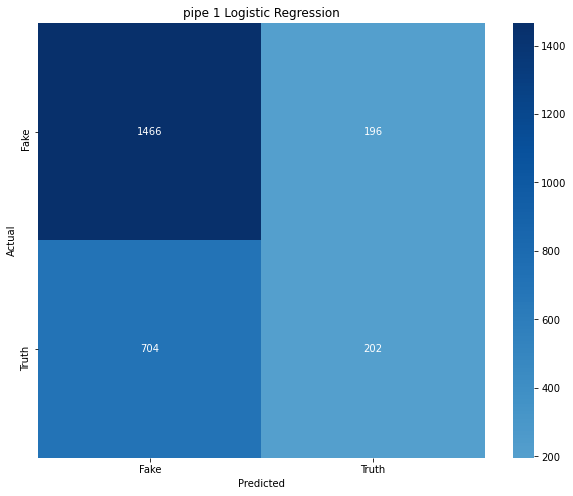

In [11]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 1 Logistic Regression')

### Using `pipe2`

In [12]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe2_LR_bi_B.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[1]='pipe 2 Logistic Regression'
print_results() 

Accuracy:  0.6082554517133957
              precision    recall  f1-score   support

        Fake       0.67      0.77      0.72      1662
       Truth       0.42      0.31      0.36       906

    accuracy                           0.61      2568
   macro avg       0.55      0.54      0.54      2568
weighted avg       0.59      0.61      0.59      2568

[[1279  383]
 [ 623  283]]


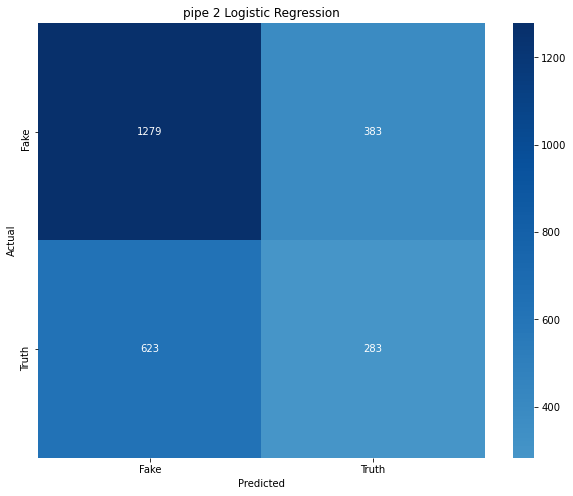

In [13]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 2 Logistic Regression')

## Multinomial Naive Bayes

### Using `pipe1`

In [14]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe1_MNB_bi_B.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[2]='pipe 1 Multinomial Naive Bayes'
print_results() 

Accuracy:  0.6448598130841121
              precision    recall  f1-score   support

        Fake       0.65      0.97      0.78      1662
       Truth       0.47      0.05      0.08       906

    accuracy                           0.64      2568
   macro avg       0.56      0.51      0.43      2568
weighted avg       0.59      0.64      0.53      2568

[[1614   48]
 [ 864   42]]


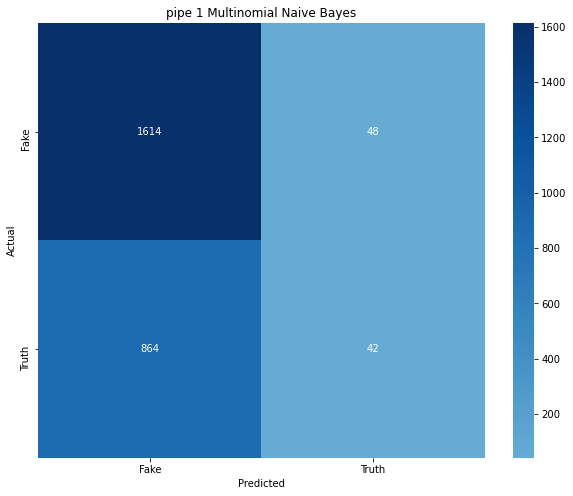

In [15]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 1 Multinomial Naive Bayes')

### Using `pipe2`

In [16]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe2_MNB_bi_B.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[3]='pipe 2 Multinomial Naive Bayes'
print_results() 

Accuracy:  0.6257788161993769
              precision    recall  f1-score   support

        Fake       0.68      0.78      0.73      1662
       Truth       0.46      0.34      0.39       906

    accuracy                           0.63      2568
   macro avg       0.57      0.56      0.56      2568
weighted avg       0.60      0.63      0.61      2568

[[1300  362]
 [ 599  307]]


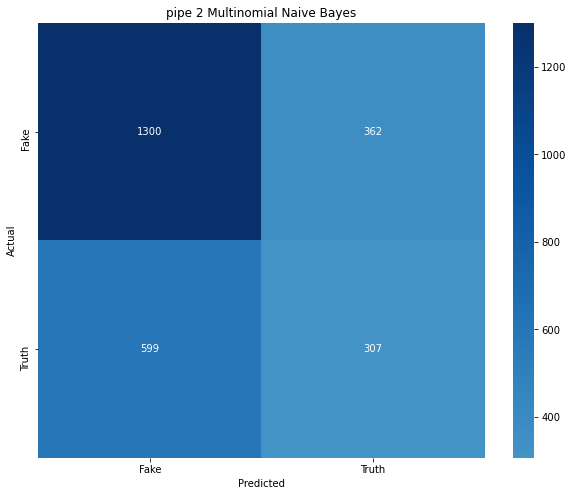

In [17]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 2 Multinomial Naive Bayes')

## Support Vector Machine

### Using `pipe1`

In [18]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe1_SVM_bi_B.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[4]='pipe 1 Support Vector Machine'
print_results() 

Accuracy:  0.6335669781931464
              precision    recall  f1-score   support

        Fake       0.67      0.85      0.75      1662
       Truth       0.46      0.24      0.32       906

    accuracy                           0.63      2568
   macro avg       0.57      0.54      0.53      2568
weighted avg       0.60      0.63      0.60      2568

[[1409  253]
 [ 688  218]]


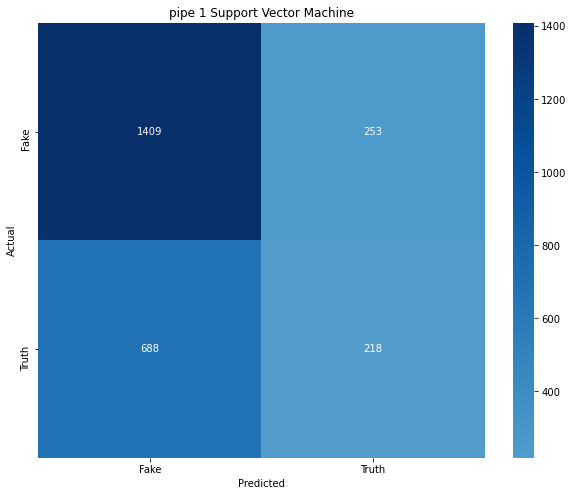

In [19]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 1 Support Vector Machine')

### Using `pipe2`

In [20]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe2_SVM_bi_B.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[5]='pipe 2 Support Vector Machine'
print_results() 

Accuracy:  0.5996884735202492
              precision    recall  f1-score   support

        Fake       0.68      0.73      0.70      1662
       Truth       0.42      0.36      0.39       906

    accuracy                           0.60      2568
   macro avg       0.55      0.55      0.55      2568
weighted avg       0.59      0.60      0.59      2568

[[1214  448]
 [ 580  326]]


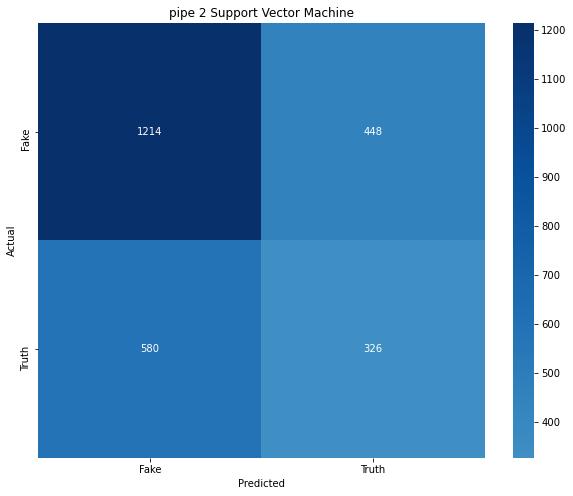

In [21]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 2 Support Vector Machine')

## Decision Tree Classifier

### Using `pipe1`

In [22]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe1_DTC_bi_B.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[6]='pipe 1 Decision Tree Classifier'
print_results() 

Accuracy:  0.5712616822429907
              precision    recall  f1-score   support

        Fake       0.67      0.67      0.67      1662
       Truth       0.39      0.38      0.39       906

    accuracy                           0.57      2568
   macro avg       0.53      0.53      0.53      2568
weighted avg       0.57      0.57      0.57      2568

[[1120  542]
 [ 559  347]]


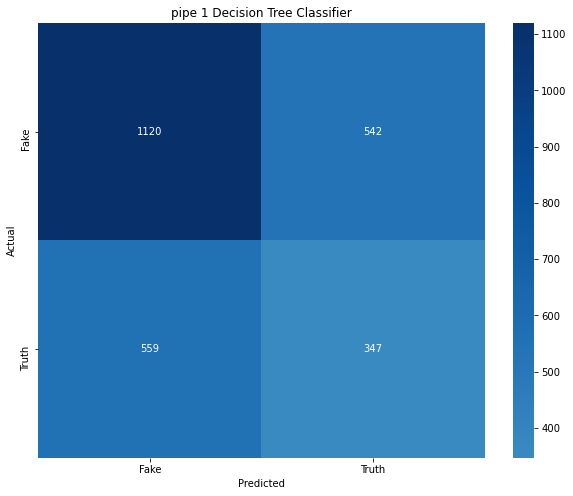

In [23]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 1 Decision Tree Classifier')

### Using `pipe2`

In [24]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe2_DTC_bi_B.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[7]='pipe 2 Decision Tree Classifier'
print_results() 

Accuracy:  0.5852803738317757
              precision    recall  f1-score   support

        Fake       0.67      0.70      0.69      1662
       Truth       0.41      0.38      0.39       906

    accuracy                           0.59      2568
   macro avg       0.54      0.54      0.54      2568
weighted avg       0.58      0.59      0.58      2568

[[1163  499]
 [ 566  340]]


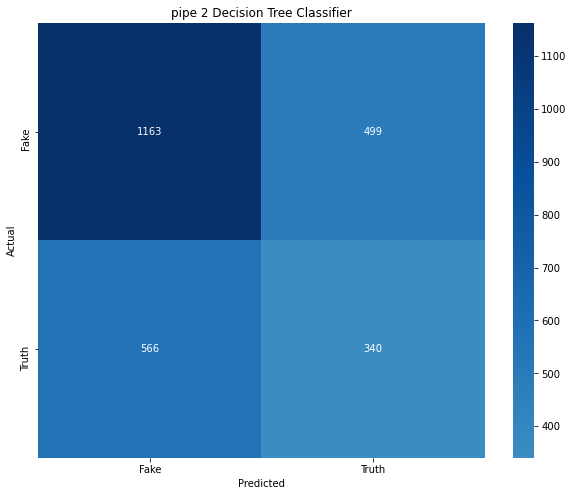

In [25]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 2 Decision Tree Classifier')

## Random Forest Classifier

### Using `pipe1`

In [26]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe1_RFC_bi_B.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[8]='pipe 1 Random Forest Classifier'
print_results() 

Accuracy:  0.6456386292834891
              precision    recall  f1-score   support

        Fake       0.67      0.90      0.77      1662
       Truth       0.49      0.17      0.26       906

    accuracy                           0.65      2568
   macro avg       0.58      0.54      0.51      2568
weighted avg       0.61      0.65      0.59      2568

[[1501  161]
 [ 749  157]]


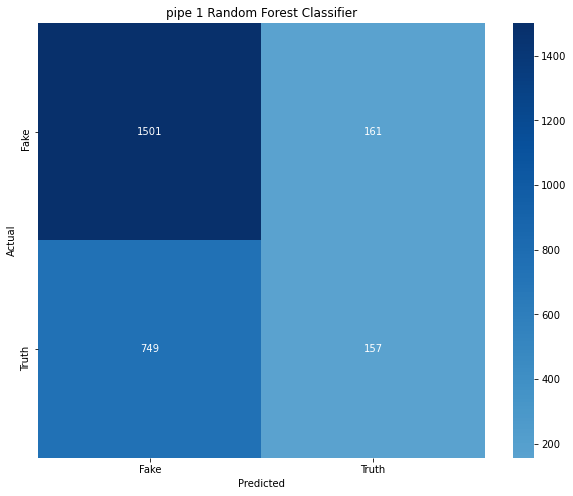

In [27]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 1 Random Forest Classifier')

### Using `pipe2`

In [28]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe2_RFC_bi_B.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[9]='pipe 2 Random Forest Classifier'
print_results() 

Accuracy:  0.6452492211838006
              precision    recall  f1-score   support

        Fake       0.66      0.91      0.77      1662
       Truth       0.49      0.15      0.23       906

    accuracy                           0.65      2568
   macro avg       0.58      0.53      0.50      2568
weighted avg       0.60      0.65      0.58      2568

[[1520  142]
 [ 769  137]]


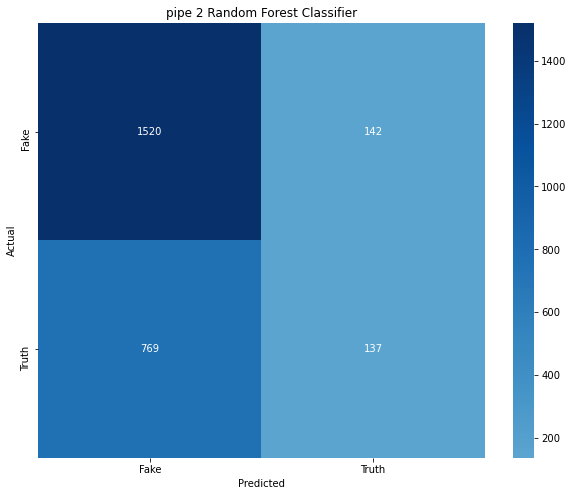

In [29]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 2 Random Forest Classifier')

## Accuracy of the models

In [30]:
for i in range(len(model_accuracy)):
    print("{} accuracy: {}".format(model_dict[i], model_accuracy[i]))

pipe 1 Logistic Regression accuracy: 0.6495327102803738
pipe 2 Logistic Regression accuracy: 0.6082554517133957
pipe 1 Multinomial Naive Bayes accuracy: 0.6448598130841121
pipe 2 Multinomial Naive Bayes accuracy: 0.6257788161993769
pipe 1 Support Vector Machine accuracy: 0.6335669781931464
pipe 2 Support Vector Machine accuracy: 0.5996884735202492
pipe 1 Decision Tree Classifier accuracy: 0.5712616822429907
pipe 2 Decision Tree Classifier accuracy: 0.5852803738317757
pipe 1 Random Forest Classifier accuracy: 0.6456386292834891
pipe 2 Random Forest Classifier accuracy: 0.6452492211838006
